# Data Understanding 


In [1]:
import pandas as pd    
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);
pd.set_option('display.float_format', lambda x: '%.0f' % x)

import matplotlib.pyplot as plt

#Data set reading process was performed.
df_2010_2011 = pd.read_excel("online_retail.xlsx", sheet_name = "Year 2010-2011")
df = df_2010_2011.copy()

In [2]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [6]:

df.shape


(406830, 8)

In [7]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,406830,12,249,-80995,-2,1,1,2,5,12,24,36,120,80995
Price,406830,3,69,0,0,0,1,1,2,4,7,8,15,38970
Customer ID,406830,15288,1714,12346,12415,12626,12876,13953,15152,16791,17719,17905,18212,18287


 RFM Skorları ile Müşteri Segmentasyonu

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [10]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [11]:
import datetime as dt
today_date = dt.datetime(2010,12,9)

In [12]:
today_date

datetime.datetime(2010, 12, 9, 0, 0)

In [13]:
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:17:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [14]:
df["Customer ID"] = df["Customer ID"].astype(int)

In [15]:
(today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).head()

,InvoiceDate
Customer ID,
12346,-41 days +13:43:00
12347,-364 days +08:08:00
12348,-291 days +10:47:00
12349,-348 days +14:09:00
12350,-56 days +07:59:00


In [16]:
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
temp_df.head()

,Recency
Customer ID,
12346,-41 days +13:43:00
12347,-364 days +08:08:00
12348,-291 days +10:47:00
12349,-348 days +14:09:00
12350,-56 days +07:59:00


Recency 

In [17]:
recency_df = temp_df["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346    -41
12347   -364
12348   -291
12349   -348
12350    -56
Name: Recency, dtype: int64

Frequency

In [19]:
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
            C541433        1
12347       537626        31
            542237        29
            549222        24

In [20]:
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head()

,Invoice
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [21]:
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


Monetary


In [23]:
df["TotalPrice"] = df["Quantity"]*df["Price"]
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [24]:
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4372,) (4372, 1) (4372, 1)


In [25]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,-41,2,0
12347,-364,7,4310
12348,-291,4,1797
12349,-348,1,1758
12350,-56,1,334


In [27]:
rfm.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [32]:

rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4372 non-null   int64  
 1   Frequency  4372 non-null   int64  
 2   Monetary   4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [31]:
rfm.shape

(4372, 3)

In [33]:
rfm.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,4372,-274,101,-366,-365,-364,-362,-350,-316,-223,-103,-54,2,7
Frequency,4372,5,9,1,1,1,1,1,3,5,11,16,36,248
Monetary,4372,1898,8219,-4288,0,101,146,293,648,1612,3506,5625,17226,279489


In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
df = sc.fit_transform(rfm)
df

array([[0.87131367, 0.00404858, 0.01510917],
       [0.00536193, 0.0242915 , 0.03029717],
       [0.20107239, 0.01214575, 0.02144246],
       ...,
       [0.01876676, 0.00809717, 0.01573149],
       [0.0080429 , 0.06072874, 0.02249131],
       [0.11260054, 0.00809717, 0.02158356]])

Optimum Küme Sayısının Belirlenmesi


In [36]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)
    
ssd
    

[328.95450381733104,
 75.22698978295699,
 40.56731551578181,
 26.951611748358776,
 20.164266020635615,
 15.942651879444792,
 12.62330557695251,
 10.70257502860592,
 9.357082092297729,
 7.95067489760623,
 6.770160075789459,
 5.709551452523881,
 5.024737349829212,
 4.387150009031977,
 3.902283060293584,
 3.5623276797911805,
 3.2813524590909133,
 3.0050948809932074,
 2.8087520922946316,
 2.5480649429610436,
 2.4209456859897758,
 2.31466282340454,
 2.1841849102761604,
 2.023869627957341,
 1.9682224203229384,
 1.8663658697002874,
 1.7635185697275784,
 1.6560086961947311,
 1.5838187305933433]

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

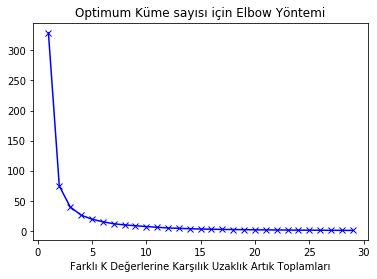

In [37]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [40]:
kmeans = KMeans(n_clusters = 5)


In [41]:
kmeans


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
k_fit = kmeans.fit(df)


In [43]:
k_fit.n_clusters


5

In [44]:
k_fit.cluster_centers_


array([[0.4086793 , 0.00623279, 0.01755518],
       [0.04363033, 0.02836997, 0.02647597],
       [0.89147025, 0.00214848, 0.01626076],
       [0.64572875, 0.00304323, 0.01685311],
       [0.18455938, 0.00877322, 0.01866535]])

In [45]:
k_fit.labels_

array([2, 1, 4, ..., 1, 1, 4])

In [59]:
k_means = KMeans(n_clusters = 5).fit(df)
#k_means = KMeans(n_clusters = 10).fit(df)

In [60]:
kumeler = k_means.labels_

In [61]:
kumeler

array([4, 1, 3, ..., 1, 1, 3])

In [62]:
df = pd.DataFrame(df)

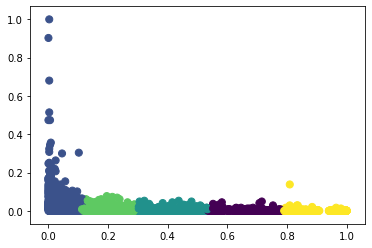

In [63]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");

In [56]:
merkezler = k_means.cluster_centers_

In [57]:
merkezler

array([[0.08539014, 0.01326228, 0.01986276],
       [0.7709474 , 0.0028226 , 0.01658948],
       [0.61210716, 0.00328947, 0.01702881],
       [0.301549  , 0.00733243, 0.01823611],
       [0.94891675, 0.00109421, 0.0159554 ],
       [0.17638592, 0.00887971, 0.01870191],
       [0.01761507, 0.12462223, 0.06648499],
       [0.01145503, 0.47110784, 0.4286943 ],
       [0.45338951, 0.00603817, 0.01721926],
       [0.02419899, 0.02141078, 0.02177951]])

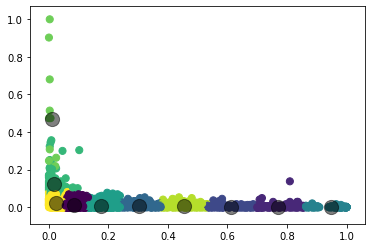

In [58]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5);